In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Differential Equations with More than One Variable

In physics we usually see simultaneous differential equations, where the derivative of each variable can depend on any or all of the variables, as well as the independent variable $t$. For example:
\
\
$$\frac{dx}{dt} = xy - x, \qquad \frac{dy}{dt} = y - xy + \sin^2 \omega t$$
\
\
These are still ordinary differential equations. We can write this in a general form
\
\
$$\frac{dx}{dt} = f_x(x,y,t),\qquad \frac{dy}{dt} = f_y(x,y,t).$$
\
\
For an arbitrary number of variables the equations can be written using vector notation as 
\
\
$$\frac{d\vec{r}}{dt} = \vec{f}(\vec{r},t)$$
\
\
where $\vec{r} = (x(t),y(t),\ldots)$ and $\vec{f}(\vec{r}, t) = (f_x(\vec{r},t), f_y(\vec{r},t), \ldots)$. This isn't more difficult than the one-variable case.

# Euler's method for a simultaneous system

$$\vec{r}(t + h) = \vec{r}(t) + h \vec{f}(\vec{r},t)$$

In [2]:
def odeEuler_simultaneous(f,r0,t):
    # n is the number of equations
    n = len(r0)
    
    # N is the number of grid points
    N = len(t)
    
    # Step size
    h = (t[-1] - t[0]) / N
    
    # Setup r. Each row takes the form (xi, yi), etc
    r = np.zeros((len(t) ,len(r0)))
    r[0] = r0 # Change zeroth row to initial condition
        
    # Euler's method algorithm
    for i in range(0, N-1):
        r[i+1] = r[i] + h*f(r[i],  t[i])
        
    return r.T

# Runge-Kutta 4 for a simultaneous system

In [3]:
def rk4_simultaneous(f, r0, t):
    
    # n is the number of equations
    n = len(r0)
    
    # N is the number of grid points
    N = len(t)
    
    # Step size
    h = (t[-1] - t[0]) / N
    
    # Setup r. Each row takes the form (xi, yi), etc
    r = np.zeros((len(t) ,len(r0)))
    r[0] = r0 # Change zeroth row to initial condition
        
    # RK4 algorithm
    for i in range(0, N-1):
        k1 = h * f(r[i],  t[i])
        k2 = h * f(r[i] + 0.5*k1, t[i] + 0.5*h)
        k3 = h * f(r[i] + 0.5*k2, t[i] + 0.5*h)
        k4 = h * f(r[i] + k3, t[i] + h)
        r[i+1] = r[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return r.T

# Problem:

Suppose we want to solve 
$$\frac{dx}{dt} = xy - x, \qquad \frac{dy}{dt} = y - xy + \sin^2 t$$

<IPython.core.display.Javascript object>


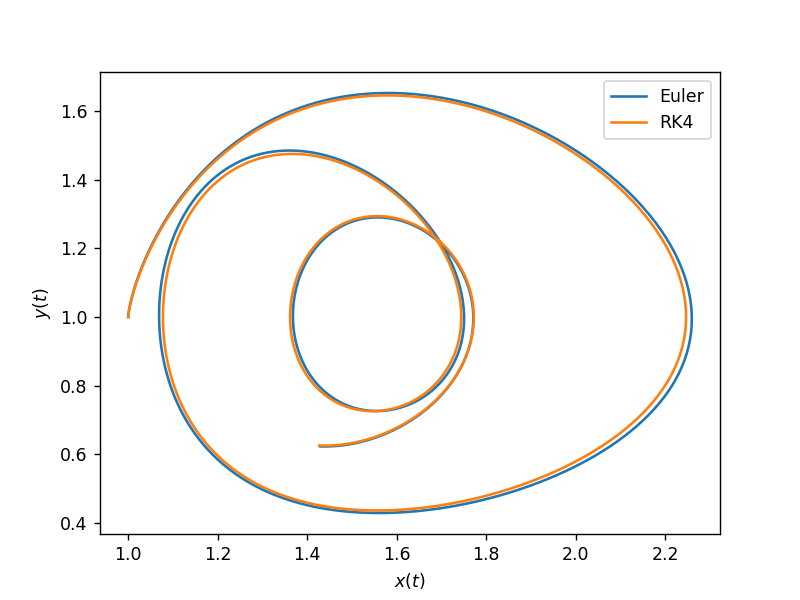

In [4]:
def f(r, t):
    '''
    Parameters
        r: 1x2 array
        t: 1xN array
    
    Returns
        f: 1x2 array
    '''
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    
    return np.array([fx,fy])

a = 0
b = 10
N = 1000
h = (b-a) / N

tpoints = np.linspace(a,b,N)
r0 = [1,1]
r_rk4 = rk4_simultaneous(f, r0, tpoints)
r_euler = odeEuler_simultaneous(f, r0, tpoints)

plt.figure()
plt.plot(r_euler[0], r_euler[1], label="Euler")
plt.plot(r_rk4[0], r_rk4[1], label="RK4")
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$y(t)$')
plt.legend()

# Rabbits and Foxes

A mathematical model that can be used to describe a predator-prey relationship is the Lotka-Volterra model. We let 
* Rabbit (the prey)
* Fox (the predator)
The Lotka-Volterra model says that the rabbits reproduce at a rate proportional to their population $(x)$, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
\
\
    $$\frac{dx}{dt} = \alpha x - \beta xy$$
\
\
At the same time the foxes reproduce at a rate proportional to the rate at which they eat the rabbits - because they need food to grow and reproduce - but also die of old age at a rate proportional to their own population.
\
\
    $$\frac{dy}{dt} = \gamma xy - \delta y$$
\
\
Read more: https://www.sciencedirect.com/topics/mathematics/lotka-volterra-model

We make use of the Runge-Kutta method. We examine the case where $\alpha = 1, \beta = \gamma = 0.5, \delta = 2$ and an initial condition of $x = y = 2$.

<IPython.core.display.Javascript object>


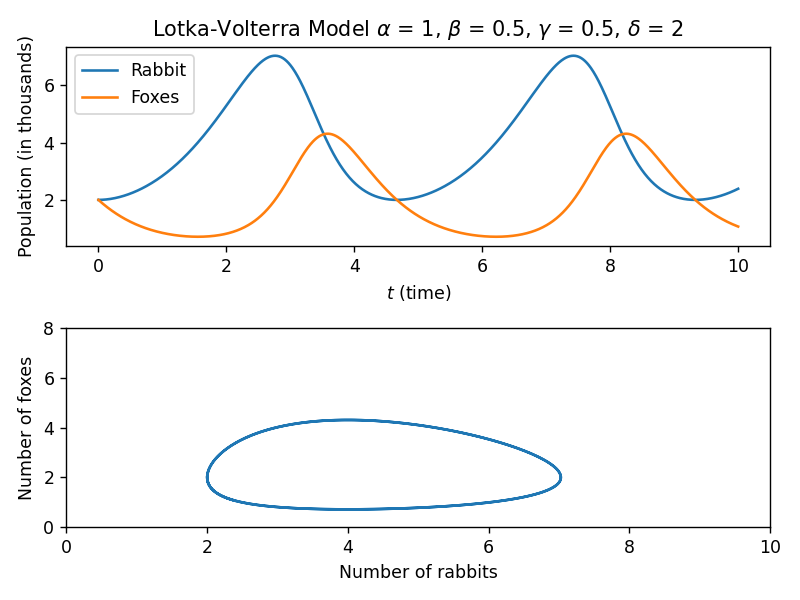

In [5]:
α = 1
β = 0.5
γ = 0.5
δ = 2
    
def f(r, t):
    x = r[0]
    y = r[1]
    
    fx = α*x - β*x*y
    fy = γ*x*y - δ*y
    
    return np.array([fx,fy])

tmin = 0
tmax = 30
N = 1000
tpoints = np.linspace(a,b,N)

r0 = [2, 2] # 2000 rabbits and 2000 foxes 
r = rk4_simultaneous(f, r0, tpoints)

plt.figure()
plt.subplot(211)
plt.plot(tpoints, r[0], label="Rabbit")
plt.plot(tpoints, r[1], label="Foxes")
plt.xlabel(r'$t$ (time)')
plt.ylabel('Population (in thousands)')
plt.title(r'Lotka-Volterra Model $\alpha$ = {}, $\beta$ = {}, $\gamma$ = {}, $\delta$ = {}'.format(α, β, γ, δ))
plt.legend(loc=2)


plt.subplot(212)
plt.plot(r[0], r[1])
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')

plt.tight_layout()

# Lorenz Attractor

The Lorenz equations are given by
\
\
    \begin{equation}
        \frac{dx}{dt} = \sigma(y-x),\qquad \frac{dy}{dt} = x(\rho - z) - y ,\qquad \frac{dz}{dt} = xy - \beta z
    \end{equation}
\
This set of equations is one of the first examples of deterministic chaos (no randomness).

In [12]:
σ = 10
ρ = 28
β = 8 / 3

def Lorenz_eqs(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    fx = σ*(y - x)
    fy = x*(ρ - z) - y
    fz = x*y - β*z
    
    return np.array([fx,fy, fz])

tmin = 0
tmax = 100
N = 100000
t = np.linspace(tmin, tmax, N)

r0 = [0,1,0]
r = rk4_simultaneous(Lorenz_eqs, r0, t)

In [13]:
x,y,z = r[0], r[1], r[2]

### Plot the Lorenz attractor

<IPython.core.display.Javascript object>


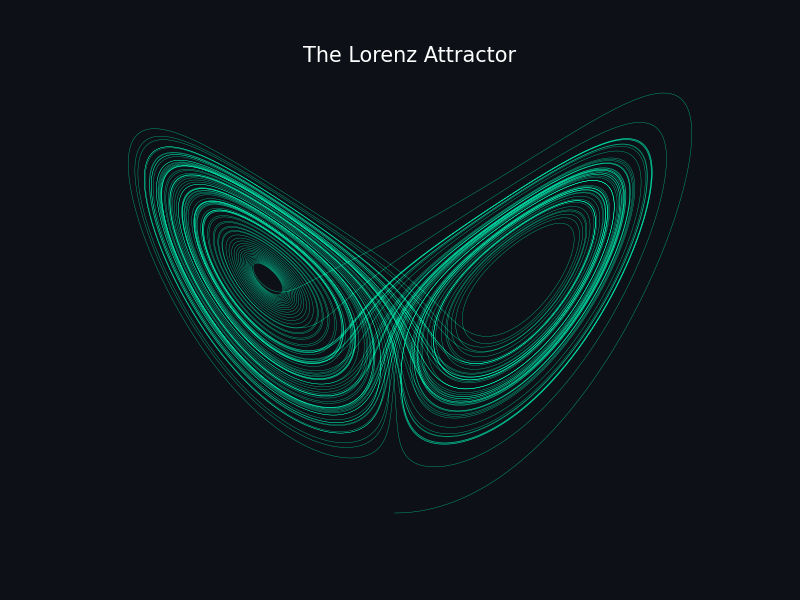

In [14]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.plot(x, z, lw=0.2, color='#00cd9a')
# ax.set_xlabel(r'$x$')
# ax.ylabel(r'$z$')
ax.set_title('The Lorenz Attractor', color='White')
ax.set_facecolor('#0D1117')
plt.axis('off')
fig.patch.set_facecolor('#0D1117')

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# No ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])

line, = ax.scatter([], [])


def init():
    line.set_data([], [])
    return line


def animate(i):
    thisx = x[i]
    thisy = z[i]

    line.set_data(thisx, thisz)
    return line

xlbl = ax.set_xlabel(r'$x$')
ax.xaxis.set_label_coords(1.03, 0.518)


ylbl = ax.set_ylabel(r'$y$')
ylbl.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(0, len(y)),
                              interval=100,
                              init_func=init)

<IPython.core.display.Javascript object>

TypeError: cannot unpack non-iterable PathCollection object

# SIR Model for Epidemics

In [ ]:
plt.savefig('images and animations/LorenzAttractor', dpi=500)